# Global Power Plant Database

# Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database

The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013 
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

# Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

# Prediction :   
Make two prediction  
1) Primary Fuel    
2) capacity_mw 

We need to predict:- 
- 1.primary_fuel,which is categorical data,so it is a classification Problem. 
- 2.capacity_mw ,which is continuous data,so it is a Regression problem.

# Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
import xgboost 
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv('database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# Exploratory Data Analysis(EDA)

Firstly to understand about the dataset, we should know how much data is there in the dataset. 

In [3]:
# Checking the dimensions of this dataset.
df.shape

(907, 27)

There are 907 rows and 27 columns.

In [4]:
# checkng the columns present in the dataset.
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

- Variable name is not having any space and other special character.

In [5]:
# To confirm about the first prediction right, Cheching the datatypes of all the columns.
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Out of 27 Columns in the data set, 
- Object type (Categorical column) = 12
- Float type (Numerical column) = 15

In [6]:
# For getting the overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

As we can see, some columns have '0' or '1' data only, i.e,
- other_fuel2 has only '1' data.
- other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh have '0' or no data.

So will drop these 6 columns.

In [7]:
#Count of unique value in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [8]:
df.country.value_counts()

IND    907
Name: country, dtype: int64

In [9]:
df.country_long.value_counts()

India    907
Name: country_long, dtype: int64

In [10]:
df.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [11]:
df.year_of_capacity_data.value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [12]:
df.generation_data_source.value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

From looking above situations of the unique and count values, the below data also can be dropped as it may not affect our target variable in any means.
- country, country_long, geolocation_source,year_of_capacity_data, generation_data_source.

But before we conclude the list of drop columns, lets check the null value count also.

In [13]:
# checking the null values in the dataframe
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Till now our drop list consists of 
- other_fuel2, other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh.
- country, country_long, geolocation_source,year_of_capacity_data, generation_data_source.

From above information we can see that most of the drop list data has either high null values or minimum null values.

So it is clear that we can proceed dropping the list we have made.

But seeing the null values we can add some more columns to the drop list, lets check.

In [14]:
df.other_fuel1.value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

Below variables are dropped as there is hughe missing values present and no data available for analysis.
- 'other_fuel1','url','owner','wepp_id',

So our final drop list consists of

- 'other_fuel2', 'other_fuel3', 'wepp_id, generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh'.
- 'country', 'country_long', 'geolocation_source', 'year_of_capacity_data', 'generation_data_source'.
- 'other_fuel1','url','owner','wepp_id',

In [15]:
#Check for duplicate data
df.duplicated().sum()

0

- So there is no duplicate datas in the columns.

In [16]:
# Dropping Columns
df.drop(columns=['other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 
                 'estimated_generation_gwh', 'country', 'country_long', 'geolocation_source', 
                 'year_of_capacity_data', 'generation_data_source','other_fuel1','url','owner'],axis=1,inplace =True)

# Checking our dataset after dropping columns which are not affecting our target variable.

In [17]:
# Checking the dimensions of this dataset.
df.shape

(907, 13)

now there are 13 cols & 907 rows

In [18]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [19]:
# checkng the columns present in the dataset.
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   gppd_idnr            907 non-null    object 
 2   capacity_mw          907 non-null    float64
 3   latitude             861 non-null    float64
 4   longitude            861 non-null    float64
 5   primary_fuel         907 non-null    object 
 6   commissioning_year   527 non-null    float64
 7   source               907 non-null    object 
 8   generation_gwh_2014  398 non-null    float64
 9   generation_gwh_2015  422 non-null    float64
 10  generation_gwh_2016  434 non-null    float64
 11  generation_gwh_2017  440 non-null    float64
 12  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(4)
memory usage: 92.2+ KB


Now the dataframe has 9 float variables & 4 objects variables.

In [21]:
#Checking the statistical Summary of the dataset
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [22]:
numerics = ['float64', 'int64']
numeric_ds = df.select_dtypes(include=numerics)
objects_ds = df.select_dtypes(exclude=numerics)

dataset is separated with object & numeric col for better EDA

In [23]:
objects_ds.head()

,name,gppd_idnr,primary_fuel,source
0,ACME Solar Tower,WRI1020239,Solar,National Renewable Energy Laboratory
1,ADITYA CEMENT WORKS,WRI1019881,Coal,Ultratech Cement ltd
2,AES Saurashtra Windfarms,WRI1026669,Wind,CDM
3,AGARTALA GT,IND0000001,Gas,Central Electricity Authority
4,AKALTARA TPP,IND0000002,Coal,Central Electricity Authority


In [24]:
objects_ds.describe()

,name,gppd_idnr,primary_fuel,source
count,907,907,907,907
unique,907,907,8,191
top,KCSF SANGUR,IND0000091,Coal,Central Electricity Authority
freq,1,1,258,519


- source col has 191 unique class with Central Electric Authority is the highest.
- primary fuel has 8 unique class with coal has the highest freq count of 259.

In [25]:
numeric_ds.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


- capacity_mw there is hughe diff in max & 75th percentile.
- generation_gwh_2014 to generation_gwh_2018, min value is 0 and Max value is increaing from 2014 to 2018.

# Data Visualization

In [26]:
df.groupby('primary_fuel').size()

primary_fuel
Biomass     50
Coal       258
Gas         69
Hydro      251
Nuclear      9
Oil         20
Solar      127
Wind       123
dtype: int64

- Coal and Hydro fuel counts are more than compared to other fuel types.
- Nuclear fuel has the least count.

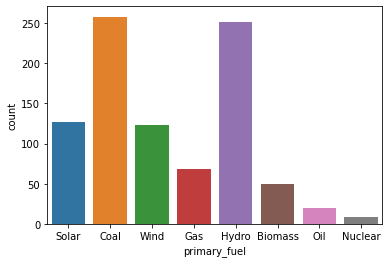

In [27]:
sns.countplot(df['primary_fuel']);

- Solar and Wind fuel are main competitor for the Coal and Hydro fuel.
- Primary fuel has 8 kind of fuel type, where nuclear is the least one & Coal is the highest fuel type.

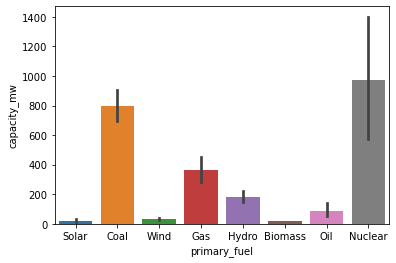

In [28]:
# Visualizing the Histogram of the Target Variable
ax = sns.barplot(x='primary_fuel', y= 'capacity_mw' , data=df) 

- Nuclear fuel has the highest capacity_mw as compared with other fuel type.
- And Solar, Wind and Biomass fuel type has the least capacity_mw

# Labelencoder

In [29]:
# categorical variable encoding
cat_vars_list = objects_ds.columns.tolist()
## Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

In [30]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,657,2.5,28.1839,73.2407,6,2011.0,109,NaN,NaN,NaN,NaN,NaN
1,1,519,98.0,24.7663,74.6090,1,NaN,174,NaN,NaN,NaN,NaN,NaN
2,2,853,39.2,21.9038,69.3732,7,NaN,21,NaN,NaN,NaN,NaN,NaN
3,3,0,135.0,23.8712,91.3602,2,2004.0,22,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1,1800.0,21.9603,82.4091,1,2015.0,22,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,16.2949,77.3568,1,2016.0,22,NaN,0.994875,233.596650,865.400000,686.500000
903,903,822,3.0,12.8932,78.1654,6,NaN,77,NaN,NaN,NaN,NaN,NaN
904,904,891,25.5,15.2758,75.5811,7,NaN,21,NaN,NaN,NaN,NaN,NaN
905,905,539,80.0,24.3500,73.7477,1,NaN,59,NaN,NaN,NaN,NaN,NaN


All the object col is label encoded and merged with the dataframe for further treatment.

# Removing Missing Value

In [31]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

The dataset is not clean and has missing values.

As the data is not normaly distributed in above variables so missing value is replaced by median.

In [32]:
df["latitude"] = df["latitude"].fillna(df["latitude"].median())
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [33]:
# checking for null values after replacing 
df.isnull().sum()

name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

No missing value seen after treatment

# Skewness Detection:

In [34]:
df.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            3.123576
latitude              -0.164152
longitude              1.163320
primary_fuel           0.472251
commissioning_year    -1.719575
source                 1.827373
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

array([[<AxesSubplot:title={'center':'name'}>,
        <AxesSubplot:title={'center':'gppd_idnr'}>,
        <AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'primary_fuel'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'source'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2018'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

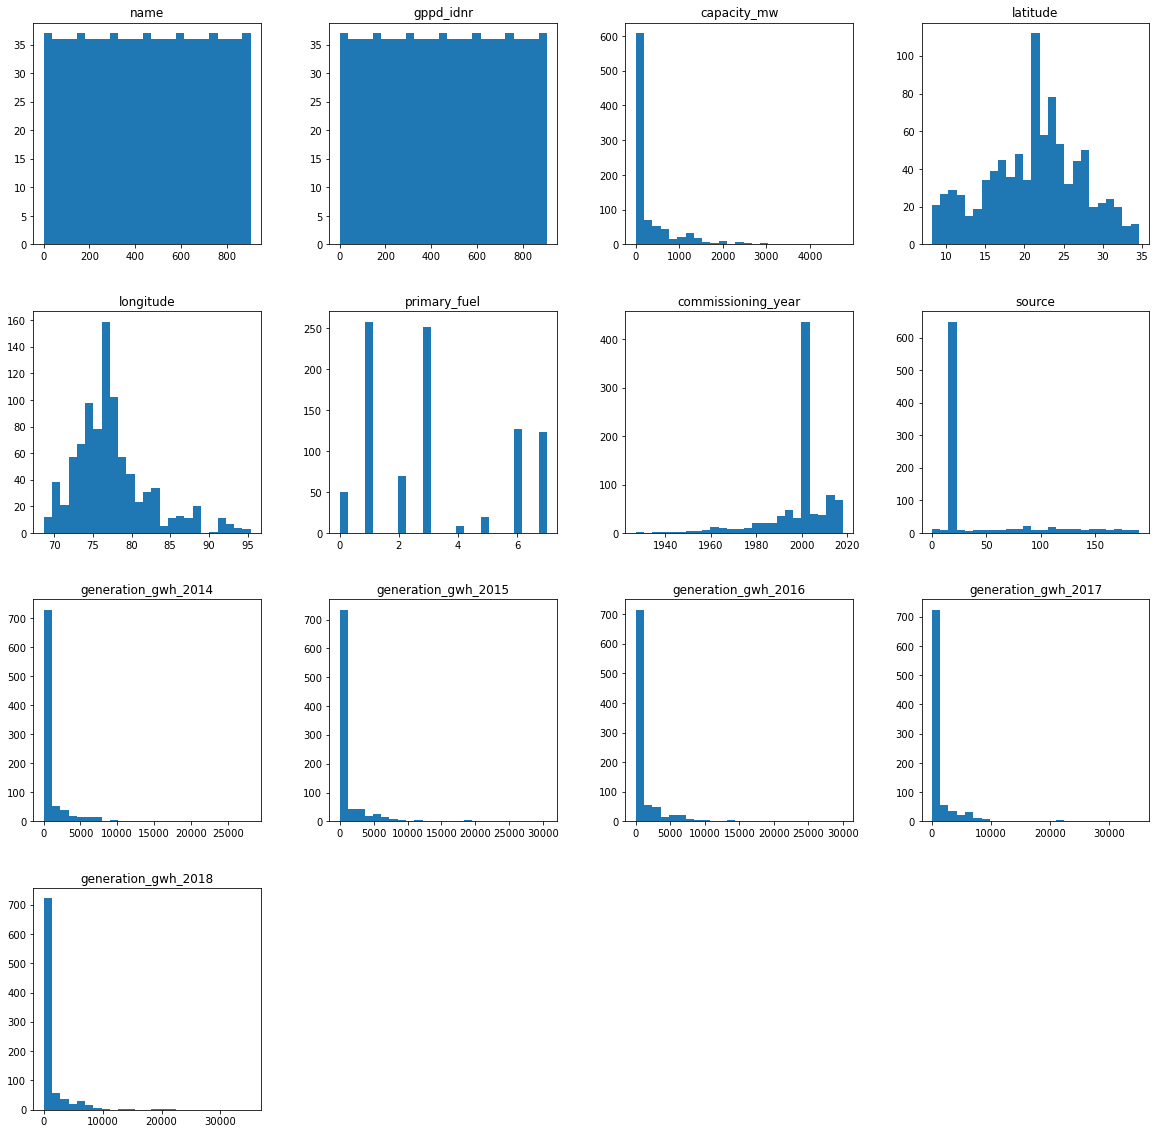

In [35]:
df.hist(grid=False, figsize=(20,20), bins=25)

- capacity_mw, source has left skewed data and value is high.
- From generation_gwh_2014 till generation_gwh_2018 the data is left skewed and shows positive skewness.

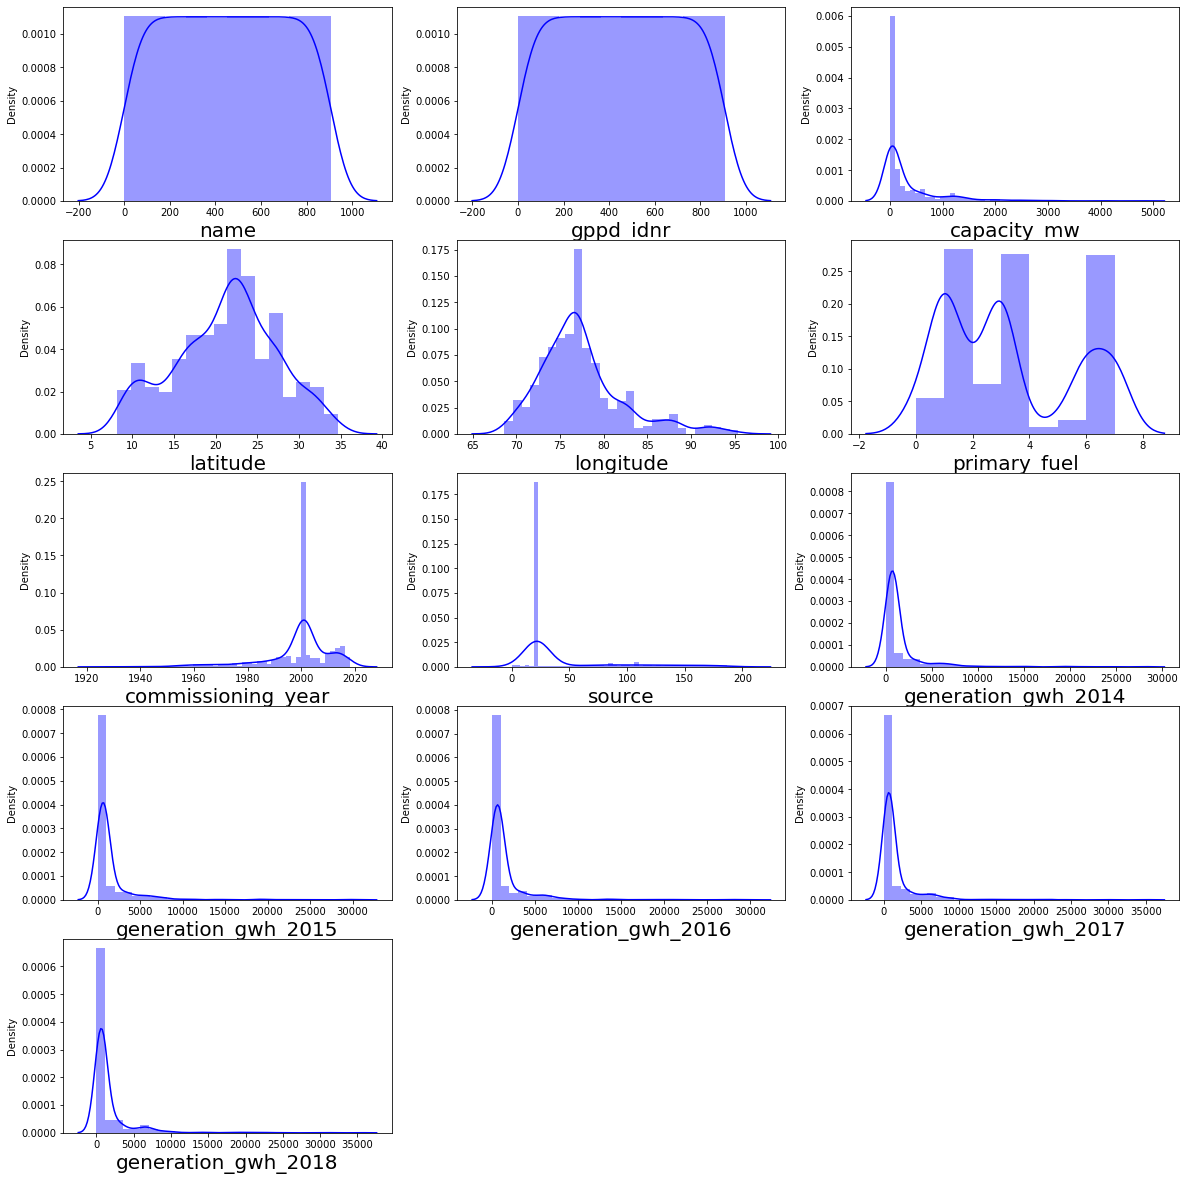

In [36]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Boxplot for Outliers Detection:

<AxesSubplot:>

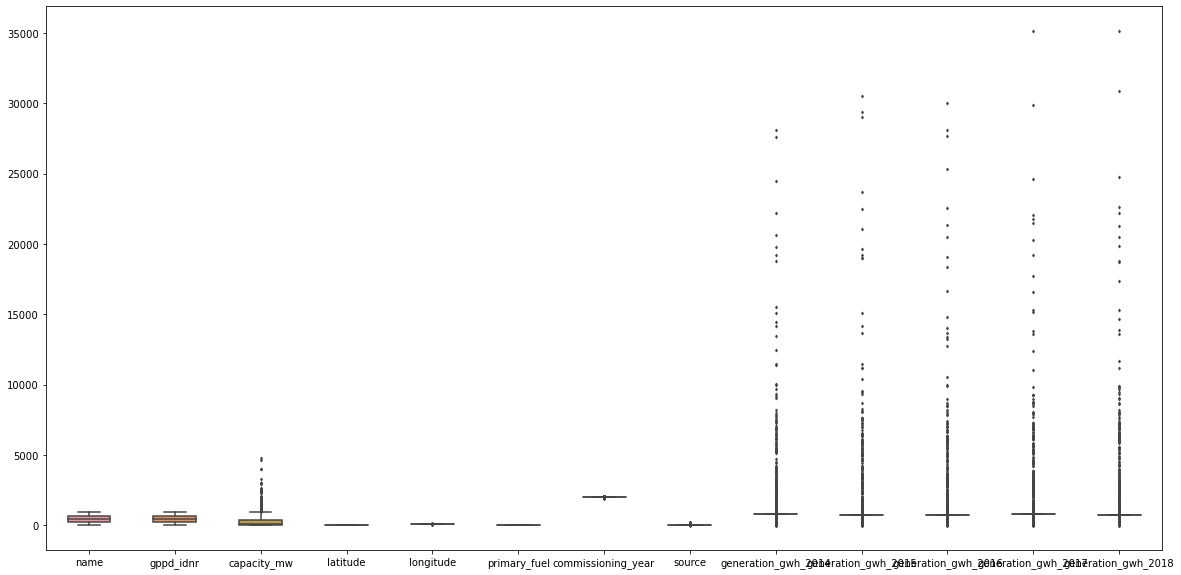

In [37]:
fig, ax =plt.subplots(figsize=(20,10))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=2)

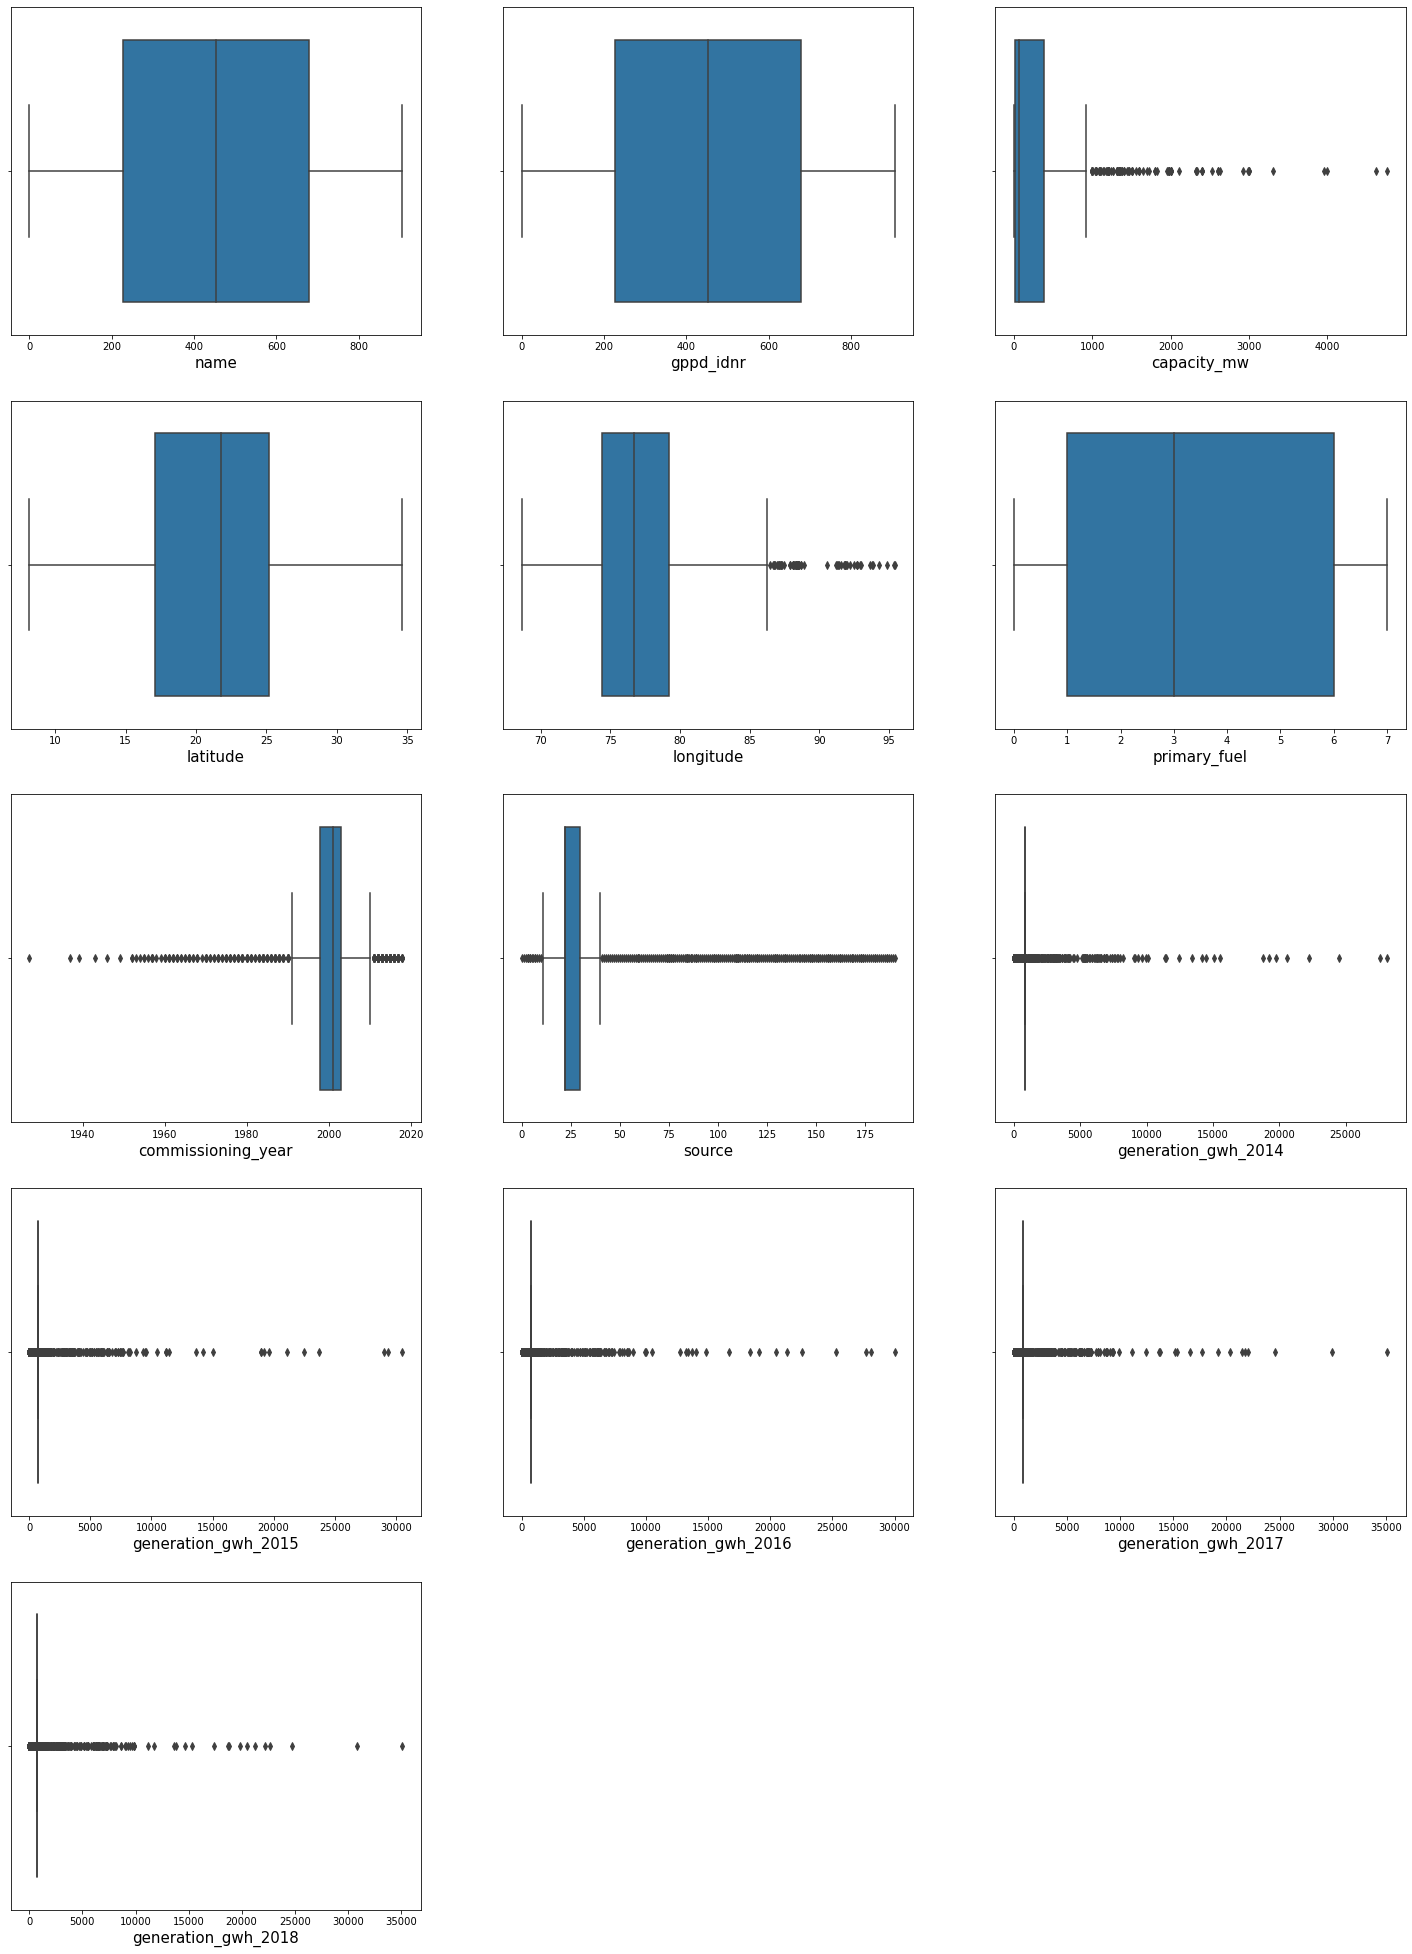

In [38]:
plt.figure(figsize=(25,35))
plotnumber = 1

for column in df:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 15)
    plotnumber+=1
plt.show()

<AxesSubplot:>

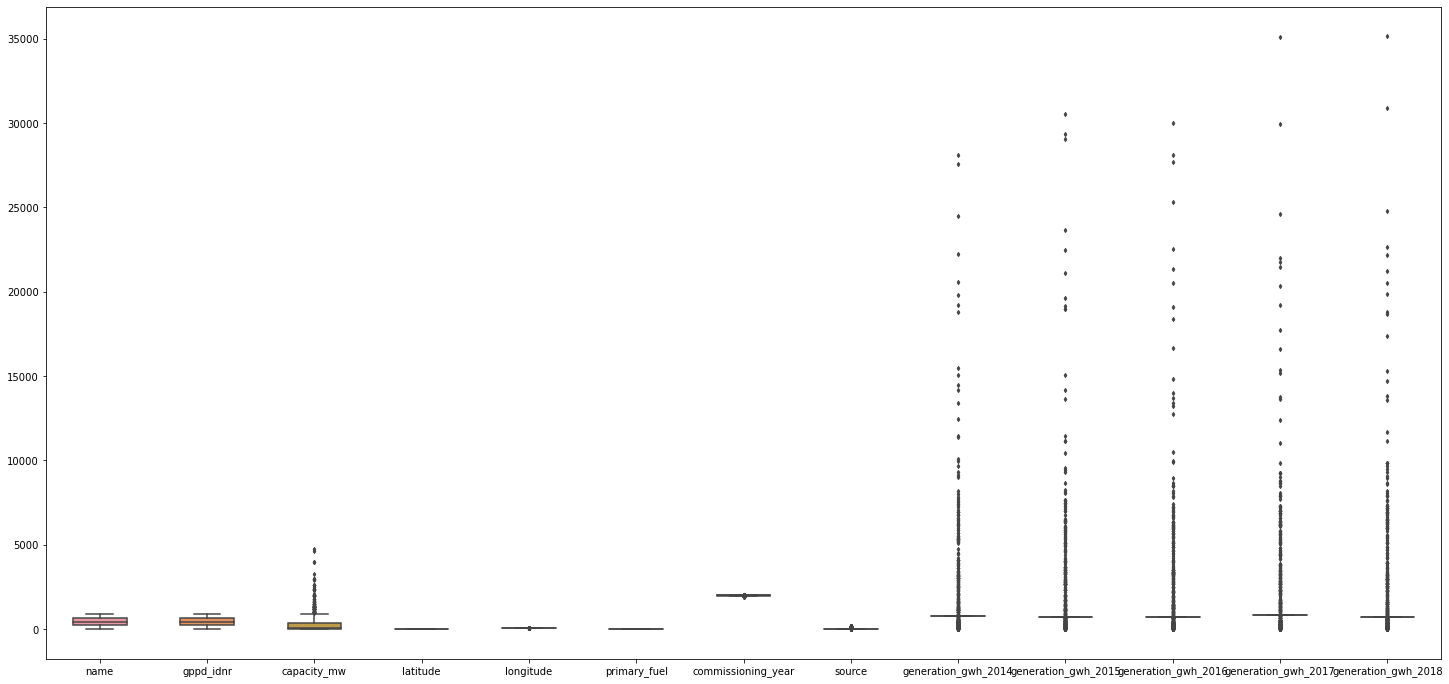

In [39]:
fig, ax =plt.subplots(figsize=(25,12))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

# Correlation between the target variable and independent variable

In [40]:
# checking the correlation of features and labels
df.corr()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
name,1.000000,0.332205,0.060240,-0.134571,0.019222,0.040753,-0.044514,-0.014640,0.082439,0.071257,0.064611,0.068557,0.064724
gppd_idnr,0.332205,1.000000,-0.335742,-0.105090,-0.378588,0.609180,0.167532,0.416384,-0.162784,-0.177538,-0.188103,-0.185810,-0.195993
capacity_mw,0.060240,-0.335742,1.000000,0.048790,0.199299,-0.380395,0.211042,-0.242122,0.793497,0.819676,0.853008,0.868338,0.884840
latitude,-0.134571,-0.105090,0.048790,1.000000,0.035619,-0.007538,0.088098,0.054324,0.057179,0.052422,0.046267,0.056407,0.053700
longitude,0.019222,-0.378588,0.199299,0.035619,1.000000,-0.352056,0.029583,-0.236623,0.106855,0.123763,0.145640,0.154014,0.157405
primary_fuel,0.040753,0.609180,-0.380395,-0.007538,-0.352056,1.000000,-0.054885,0.053613,-0.240656,-0.249304,-0.259708,-0.263599,-0.271198
commissioning_year,-0.044514,0.167532,0.211042,0.088098,0.029583,-0.054885,1.000000,0.100747,0.076971,0.108752,0.140964,0.153554,0.156927
source,-0.014640,0.416384,-0.242122,0.054324,-0.236623,0.053613,0.100747,1.000000,-0.125854,-0.131123,-0.135018,-0.134934,-0.141216
generation_gwh_2014,0.082439,-0.162784,0.793497,0.057179,0.106855,-0.240656,0.076971,-0.125854,1.000000,0.963719,0.935067,0.904075,0.895143
generation_gwh_2015,0.071257,-0.177538,0.819676,0.052422,0.123763,-0.249304,0.108752,-0.131123,0.963719,1.000000,0.973231,0.940229,0.933161


<AxesSubplot:>

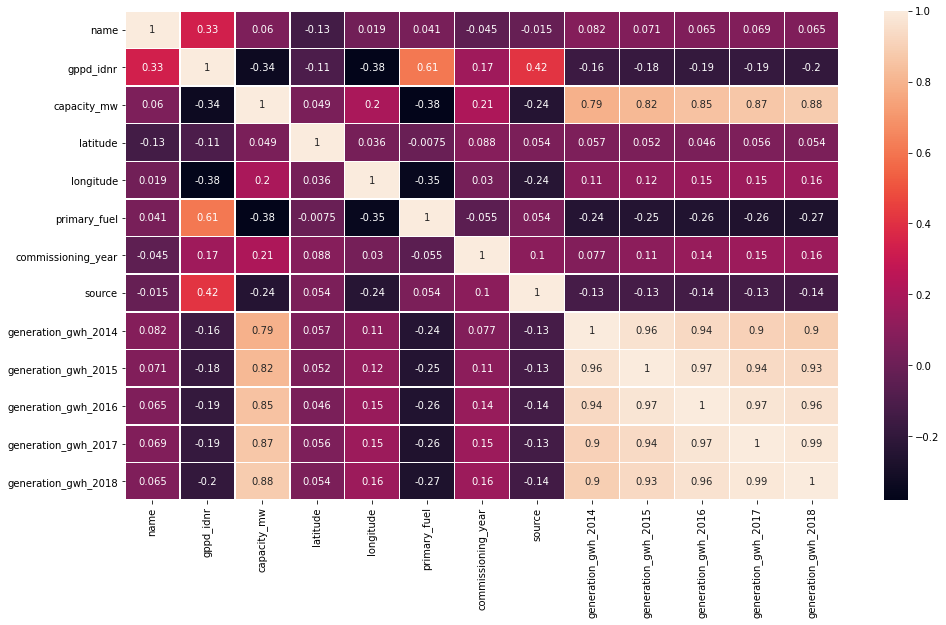

In [41]:
# Heat Map
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=0.5,annot = True)

- From generation_gwh_2014 till generation_gwh_2018 shows high +ve corr with each others.
- Target col primary fuel has only +ve corr with gppd_idnr and almost -ve corr with others.
- capacity_mw shows high +ve corr with generation_gwh_2014 till generation_gwh_2018.

# VIF : Multicollinearity Test :

In [42]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [43]:
vif_calc()

    VIF Factor             features
0     5.210401                 name
1    11.322778            gppd_idnr
2     7.472835          capacity_mw
3    13.943463             latitude
4   328.954995            longitude
5     6.125934         primary_fuel
6   375.799220   commissioning_year
7     2.943953               source
8    18.475702  generation_gwh_2014
9    43.200622  generation_gwh_2015
10   56.250537  generation_gwh_2016
11   67.905483  generation_gwh_2017
12   56.104117  generation_gwh_2018


# Z-Score Removing Outliers

In [44]:
#detecting outliers
from scipy.stats import zscore
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 219, 222,
       244, 299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342,
       345, 360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427,
       444, 454, 478, 482, 482, 484, 493, 493, 493, 493, 493, 493, 494,
       494, 494, 494, 494, 494, 499, 519, 532, 538, 541, 546, 573, 577,
       583, 592, 601, 621, 623, 638, 648, 648, 648, 648, 648, 648, 657,
       657, 657, 657, 657, 657, 661, 669, 689, 695, 695, 695, 695, 695,
       695, 706, 709, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724,
       726, 726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786,
       786, 788, 807, 808, 808, 808, 808, 808, 808, 818, 832, 847, 848,
       870, 871, 879, 880, 880, 880, 880, 880, 880, 895, 900], dtype=int64), array([ 2,  9, 10, 11, 12,  7,  7,  2,  8,  9, 10, 11, 12,  2,  8,  4,  4,
        7,  2,  8,  9, 10, 11, 12,  6,  6,  4,  7,  2, 

In [45]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)
df=dfnew

dfnew.shape= (831, 13)


In [46]:
Data_loss=((908-833)/908)*100
Data_loss

8.259911894273127

- data loss = 8.26 % 

# Dividing Dataset into Independent Variables(x) & Target Variable(y)

In [47]:
x=df.drop("primary_fuel",axis=1)
y=df["primary_fuel"] 

- x-Independent Variables.
- y-Target Variable.

In [48]:
x.shape, y.shape

((831, 12), (831,))

In [49]:
x.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,657,2.5,28.1839,73.2407,2011.0,109,801.123775,711.181225,737.205450,817.977250,751.644375
1,1,519,98.0,24.7663,74.6090,2001.0,174,801.123775,711.181225,737.205450,817.977250,751.644375
2,2,853,39.2,21.9038,69.3732,2001.0,21,801.123775,711.181225,737.205450,817.977250,751.644375
3,3,0,135.0,23.8712,91.3602,2004.0,22,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1,1800.0,21.9603,82.4091,2015.0,22,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [50]:
y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

# Removing Skewness from Independent Variables x

In [51]:
df.skew()

name                   0.024654
gppd_idnr             -0.057949
capacity_mw            1.965300
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014    2.926464
generation_gwh_2015    2.726846
generation_gwh_2016    2.666192
generation_gwh_2017    2.565658
generation_gwh_2018    2.630570
dtype: float64

name                   0.024654
gppd_idnr             -0.057949
capacity_mw            1.965300
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014    1.474047
generation_gwh_2015    2.726846
generation_gwh_2016    2.666192
generation_gwh_2017    2.565658
generation_gwh_2018    2.630570
dtype: float64

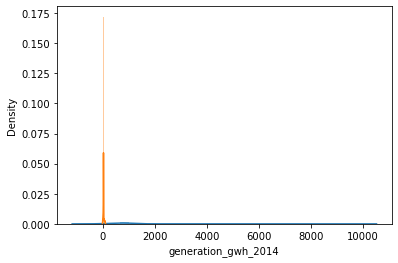

In [52]:
import numpy as np
sns.distplot(df['generation_gwh_2014'])
df['generation_gwh_2014']=np.sqrt(df['generation_gwh_2014'])
sns.distplot(df['generation_gwh_2014'])
df.skew()
#Orange Spike shows skewness & blue curve shows skewness reduced for variable.

name                   0.024654
gppd_idnr             -0.057949
capacity_mw            1.965300
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014   -0.643808
generation_gwh_2015    2.726846
generation_gwh_2016    2.666192
generation_gwh_2017    2.565658
generation_gwh_2018    2.630570
dtype: float64

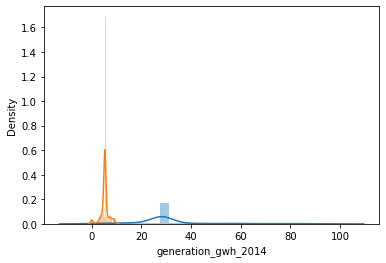

In [53]:
import numpy as np
sns.distplot(df['generation_gwh_2014'])
df['generation_gwh_2014']=np.sqrt(df['generation_gwh_2014'])
sns.distplot(df['generation_gwh_2014'])
df.skew()

name                   0.024654
gppd_idnr             -0.057949
capacity_mw            1.965300
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014   -0.643808
generation_gwh_2015    1.448679
generation_gwh_2016    2.666192
generation_gwh_2017    2.565658
generation_gwh_2018    2.630570
dtype: float64

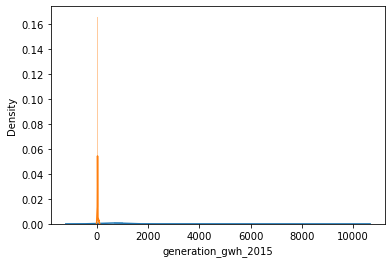

In [54]:
import numpy as np
sns.distplot(df['generation_gwh_2015'])
df['generation_gwh_2015']=np.sqrt(df['generation_gwh_2015'])
sns.distplot(df['generation_gwh_2015'])
df.skew()
#Orange Spike shows skewness & blue curve shows skewness reduced for variable.

name                   0.024654
gppd_idnr             -0.057949
capacity_mw            1.965300
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014   -0.643808
generation_gwh_2015   -0.393281
generation_gwh_2016    2.666192
generation_gwh_2017    2.565658
generation_gwh_2018    2.630570
dtype: float64

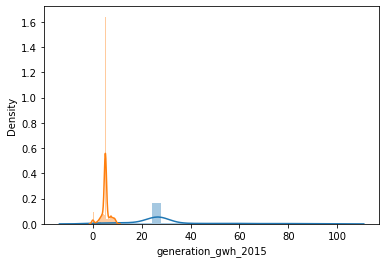

In [55]:
import numpy as np
sns.distplot(df['generation_gwh_2015'])
df['generation_gwh_2015']=np.sqrt(df['generation_gwh_2015'])
sns.distplot(df['generation_gwh_2015'])
df.skew()
#Orange Spike shows skewness & blue curve shows skewness reduced for variable.

name                   0.024654
gppd_idnr             -0.057949
capacity_mw            1.965300
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014   -0.643808
generation_gwh_2015   -0.393281
generation_gwh_2016    1.401111
generation_gwh_2017    2.565658
generation_gwh_2018    2.630570
dtype: float64

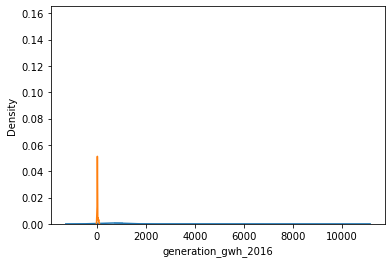

In [56]:
import numpy as np
sns.distplot(df['generation_gwh_2016'])
df['generation_gwh_2016']=np.sqrt(df['generation_gwh_2016'])
sns.distplot(df['generation_gwh_2016'])
df.skew()
#Orange Spike shows skewness & blue curve shows skewness reduced for variable.

name                   0.024654
gppd_idnr             -0.057949
capacity_mw            1.965300
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014   -0.643808
generation_gwh_2015   -0.393281
generation_gwh_2016   -0.409823
generation_gwh_2017    2.565658
generation_gwh_2018    2.630570
dtype: float64

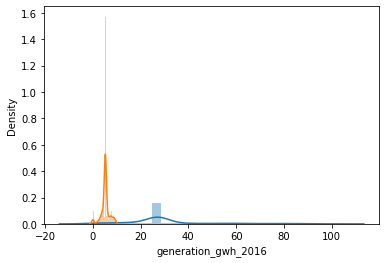

In [57]:
import numpy as np
sns.distplot(df['generation_gwh_2016'])
df['generation_gwh_2016']=np.sqrt(df['generation_gwh_2016'])
sns.distplot(df['generation_gwh_2016'])
df.skew()
#Orange Spike shows skewness & blue curve shows skewness reduced for variable.

name                   0.024654
gppd_idnr             -0.057949
capacity_mw            1.965300
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014   -0.643808
generation_gwh_2015   -0.393281
generation_gwh_2016   -0.409823
generation_gwh_2017    1.277038
generation_gwh_2018    2.630570
dtype: float64

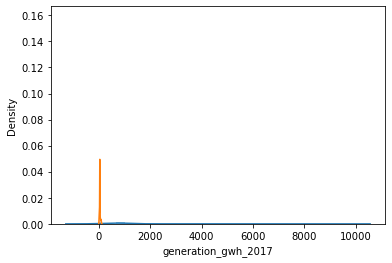

In [58]:
import numpy as np
sns.distplot(df['generation_gwh_2017'])
df['generation_gwh_2017']=np.sqrt(df['generation_gwh_2017'])
sns.distplot(df['generation_gwh_2017'])
df.skew()
#Orange Spike shows skewness & blue curve shows skewness reduced for variable.

name                   0.024654
gppd_idnr             -0.057949
capacity_mw            1.965300
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014   -0.643808
generation_gwh_2015   -0.393281
generation_gwh_2016   -0.409823
generation_gwh_2017   -0.534227
generation_gwh_2018    2.630570
dtype: float64

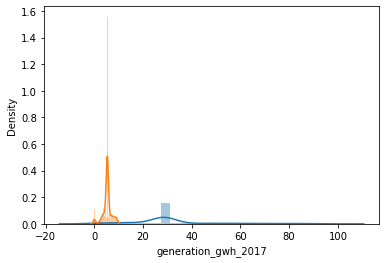

In [59]:
import numpy as np
sns.distplot(df['generation_gwh_2017'])
df['generation_gwh_2017']=np.sqrt(df['generation_gwh_2017'])
sns.distplot(df['generation_gwh_2017'])
df.skew()
#Orange Spike shows skewness & blue curve shows skewness reduced for variable.

name                   0.024654
gppd_idnr             -0.057949
capacity_mw            1.965300
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014   -0.643808
generation_gwh_2015   -0.393281
generation_gwh_2016   -0.409823
generation_gwh_2017   -0.534227
generation_gwh_2018    1.371731
dtype: float64

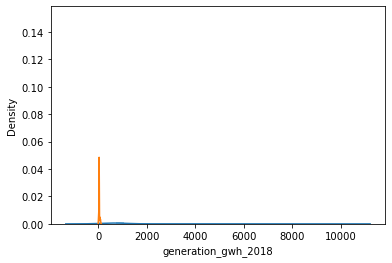

In [60]:
import numpy as np
sns.distplot(df['generation_gwh_2018'])
df['generation_gwh_2018']=np.sqrt(df['generation_gwh_2018'])
sns.distplot(df['generation_gwh_2018'])
df.skew()
#Orange Spike shows skewness & blue curve shows skewness reduced for variable.

name                   0.024654
gppd_idnr             -0.057949
capacity_mw            1.965300
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014   -0.643808
generation_gwh_2015   -0.393281
generation_gwh_2016   -0.409823
generation_gwh_2017   -0.534227
generation_gwh_2018   -0.493030
dtype: float64

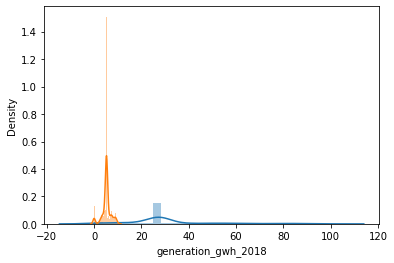

In [61]:
import numpy as np
sns.distplot(df['generation_gwh_2018'])
df['generation_gwh_2018']=np.sqrt(df['generation_gwh_2018'])
sns.distplot(df['generation_gwh_2018'])
df.skew()
#Orange Spike shows skewness & blue curve shows skewness reduced for variable.

name                   0.024654
gppd_idnr             -0.057949
capacity_mw            1.145649
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014   -0.643808
generation_gwh_2015   -0.393281
generation_gwh_2016   -0.409823
generation_gwh_2017   -0.534227
generation_gwh_2018   -0.493030
dtype: float64

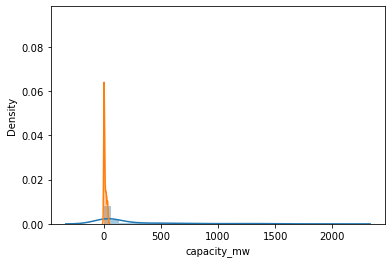

In [62]:
import numpy as np
sns.distplot(df['capacity_mw'])
df['capacity_mw']=np.sqrt(df['capacity_mw'])
sns.distplot(df['capacity_mw'])
df.skew()

name                   0.024654
gppd_idnr             -0.057949
capacity_mw            0.622621
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014   -0.643808
generation_gwh_2015   -0.393281
generation_gwh_2016   -0.409823
generation_gwh_2017   -0.534227
generation_gwh_2018   -0.493030
dtype: float64

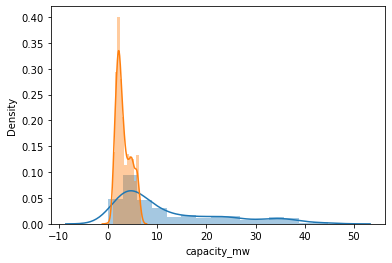

In [63]:
import numpy as np
sns.distplot(df['capacity_mw'])
df['capacity_mw']=np.sqrt(df['capacity_mw'])
sns.distplot(df['capacity_mw'])
df.skew()

# Standardization

In [64]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[-1.69709702,  0.73853681, -0.63500554, ..., -0.30935333,
        -0.30156921, -0.31891342],
       [-1.69329859,  0.21874766, -0.40847886, ..., -0.30935333,
        -0.30156921, -0.31891342],
       [-1.68950016,  1.47678806, -0.54795288, ..., -0.30935333,
        -0.30156921, -0.31891342],
       ...,
       [ 1.73668111,  1.61991841, -0.58044938, ..., -0.30935333,
        -0.30156921, -0.31891342],
       [ 1.74047954,  0.29407942, -0.45117499, ..., -0.30935333,
        -0.30156921, -0.31891342],
       [ 1.74427796,  1.56341958, -0.60179744, ..., -0.30935333,
        -0.30156921, -0.31891342]])

- Making the data in same range with standard scaler.
- Also data should be scaled before PCA.

# PCA:Dimension reduction

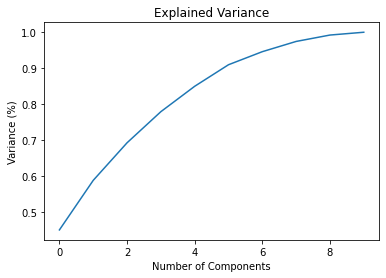

In [65]:
from sklearn.decomposition import PCA # Importing PCA from decomposition module.
pca = PCA(n_components=10) # setting 10 pca components
x = pca.fit_transform(x) # applying pca on x-independent variables.
import matplotlib.pyplot as plt
import seaborn as sna
pca = PCA()
principalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

As we can see 8 PCA component clearly explains the presence of variance with these PCA.

In [66]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x)
principal_x = pd.DataFrame(new_data,columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-1.127877,-1.142901,-2.622986,0.025685,-0.561996,0.060846,-0.287248,-0.051589
1,-1.191016,-1.192124,-2.525866,0.683772,-1.102011,1.637592,0.500682,0.149613
2,-1.209531,-0.796791,-1.053065,0.912598,-0.834311,-1.677462,-0.959000,-0.769521
3,0.012692,3.293162,-1.065969,-1.617439,-0.270686,1.575474,-0.979432,0.063173
4,7.312323,0.949778,-1.372634,-0.713079,-1.377701,-0.021760,0.636878,-0.624641
...,...,...,...,...,...,...,...,...
826,0.418742,-0.243659,1.368881,-2.141001,0.162862,-0.997931,2.051947,0.512282
827,-1.138211,-1.602431,1.791078,-0.718923,-0.151439,0.791191,-0.051985,0.074933
828,-1.072102,-1.381996,1.940207,-0.539904,0.357097,-0.537726,-0.406645,-0.208160
829,-0.909283,-1.124559,0.512248,-0.120162,1.237611,-0.175665,0.684716,0.427478


principal_x is the PCA treated independent variables.

the purpose of using PCA in this dataset is because there is hughe outliers & many variables shows corr & multicollinearity.

In [67]:
x.shape,y.shape

((831, 10), (831,))

# Decision Tree is Configured for 200 Random State

In [68]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i) 

68.26347305389223 at random_state 0
67.06586826347305 at random_state 1
71.8562874251497 at random_state 2
67.06586826347305 at random_state 3
62.874251497005986 at random_state 4
68.26347305389223 at random_state 5
69.46107784431138 at random_state 6
62.27544910179641 at random_state 7
65.26946107784431 at random_state 8
66.46706586826348 at random_state 9
64.67065868263472 at random_state 10
65.26946107784431 at random_state 11
66.46706586826348 at random_state 12
68.8622754491018 at random_state 13
67.06586826347305 at random_state 14
64.07185628742515 at random_state 15
66.46706586826348 at random_state 16
60.47904191616767 at random_state 17
65.26946107784431 at random_state 18
65.86826347305389 at random_state 19
65.26946107784431 at random_state 20
65.26946107784431 at random_state 21
66.46706586826348 at random_state 22
65.26946107784431 at random_state 23
61.07784431137725 at random_state 24
60.47904191616767 at random_state 25
70.05988023952095 at random_state 26
60.479041916

In [69]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.712  on Random_state  191


- Best Random state selected is 191 with MAE = 71.2%.

# Splitting Training Set & Test Set.

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 191)

- independent(x) & Target Variable(y) is divided into Train & Test Set.
- 70% data is set for training & 30% data is reserved for testing.
- best Random state is applied which is 191 computed above.

# Decision Tree Classifier

In [77]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test, pred)
print(acc) 

              precision    recall  f1-score   support

           0       0.45      0.69      0.55        13
           1       0.68      0.70      0.69        64
           2       0.47      0.40      0.43        20
           3       0.74      0.80      0.77        66
           4       0.00      0.00      0.00         1
           5       0.29      0.29      0.29         7
           6       1.00      0.67      0.80        42
           7       0.84      0.86      0.85        37

    accuracy                           0.71       250
   macro avg       0.56      0.55      0.55       250
weighted avg       0.73      0.71      0.71       250



- DTC learned the model with 71%.

# Random Forest Classifier

In [78]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.72      0.81      0.76        64
           2       0.78      0.35      0.48        20
           3       0.78      0.88      0.83        66
           4       0.00      0.00      0.00         1
           5       0.50      0.14      0.22         7
           6       0.94      0.79      0.86        42
           7       0.84      0.97      0.90        37

    accuracy                           0.78       250
   macro avg       0.65      0.58      0.59       250
weighted avg       0.78      0.78      0.77       250



- RFC also learned the model well with 78%

# KNN Classifier

In [79]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
acc = classification_report(y_test, pred)
print(acc)

              precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.72      0.81      0.76        64
           2       0.78      0.35      0.48        20
           3       0.78      0.88      0.83        66
           4       0.00      0.00      0.00         1
           5       0.50      0.14      0.22         7
           6       0.94      0.79      0.86        42
           7       0.84      0.97      0.90        37

    accuracy                           0.78       250
   macro avg       0.65      0.58      0.59       250
weighted avg       0.78      0.78      0.77       250



- KNN has learned with 78%.

# K-fold Cross Validation

In [74]:
# Obs : Creating CV Object with shuffle = true to avoid -ve CV Values as o/p
cross_validation=KFold(5, shuffle =True)

In [80]:
# DTClassifier
print(cross_val_score(DTC,x,y,cv=cross_validation).mean()) 

0.6449390375874756


In [81]:
# Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=cross_validation).mean()) 

0.7581631916889113


In [82]:
# KNN Classifier
print(cross_val_score(knn,x,y,cv=cross_validation).mean()) 

0.7437486472837458


# Best Model Selection
I have selected Random Forest Classifier (RFC) as the best algorithm 
- Has a good score compare to the rest.
- And has least MAE among rest others

# Hyperparameter & Grid search CV

In [83]:
#Setting Random Forest Hyperparameter

import numpy as np
parameter = {'max_depth' : np.arange(2,8),
            'criterion':['gini','entropy'],
            'n_estimators' : [100],
            'max_features' : ['auto','sqrt','log2']}

- RFC Hyperparameter is set with multiple values to select the best one through GridsearchCV

In [84]:
#Creating Gridserach CV Instance
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=cross_validation)
GCV.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

- Applying Gridsearchcv to training set with RFC hyperparameters values.

In [85]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 100}

In [86]:
Final_mod = RandomForestClassifier(criterion = 'gini', max_depth = 7,max_features='auto',n_estimators= 100)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

77.2


- Best GCV param is applied to RFC.
- where RFC learned the model with 77%.

# AUC-ROC Curve

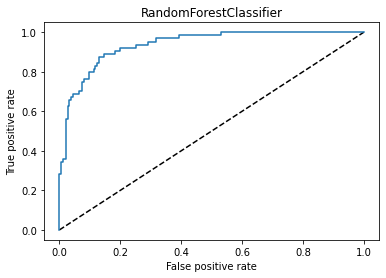

In [87]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,pos_label= 1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

ROC Curve : Classifiers that give curves closer to top left corner indicates that model will give better performance & if the curve comming closer to 45 degree diagonal of the ROC space the less accurate the model will be, so in above case the curve is closer to top left corner hence I believe the model will give better performance.

# II.Regression:

In [88]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,657,1.257433,28.1839,73.2407,6,2011.0,109,5.320163,5.164105,5.210713,5.347925,5.236042
1,1,519,3.146346,24.7663,74.6090,1,2001.0,174,5.320163,5.164105,5.210713,5.347925,5.236042
2,2,853,2.502197,21.9038,69.3732,7,2001.0,21,5.320163,5.164105,5.210713,5.347925,5.236042
3,3,0,3.408658,23.8712,91.3602,2,2004.0,22,4.985516,5.389557,5.455807,5.075807,5.002476
4,4,1,6.513556,21.9603,82.4091,1,2015.0,22,7.422656,8.770288,8.888906,8.566593,9.236723


The dataframe is the labelencoded where object variable is labelencoded.

In [89]:
x=df.drop("capacity_mw",axis=1)
y=df["capacity_mw"]

- x is the independent variables where the target var-capacity_mw is dropped.
- y is the dependent var-capacity_mw

In [90]:
x.shape,y.shape

((831, 12), (831,))

- x has 831 rows & 12 cols. without target var
- y also has same rows of 831.

In [91]:
x.skew()

name                   0.024654
gppd_idnr             -0.057949
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
generation_gwh_2014   -0.643808
generation_gwh_2015   -0.393281
generation_gwh_2016   -0.409823
generation_gwh_2017   -0.534227
generation_gwh_2018   -0.493030
dtype: float64

- As the skewness is already treated in EDA above so no much skewness is seen.

In [92]:
scale=StandardScaler() # Standard scaler instance
x=scale.fit_transform(x) # applied to independent variables
x

array([[-1.69709702,  0.73853681,  1.15297566, ..., -0.00503365,
         0.02109677, -0.00239961],
       [-1.69329859,  0.21874766,  0.59433593, ..., -0.00503365,
         0.02109677, -0.00239961],
       [-1.68950016,  1.47678806,  0.12643266, ..., -0.00503365,
         0.02109677, -0.00239961],
       ...,
       [ 1.73668111,  1.61991841, -0.95697795, ..., -0.00503365,
         0.02109677, -0.00239961],
       [ 1.74047954,  0.29407942,  0.52628768, ..., -0.00503365,
         0.02109677, -0.00239961],
       [ 1.74427796,  1.56341958, -1.83008137, ..., -0.00503365,
         0.02109677, -0.00239961]])

In [93]:
pca = PCA(n_components=10)# setting 10 pca components
x = pca.fit_transform(x)# applying pca on x-independent variables.

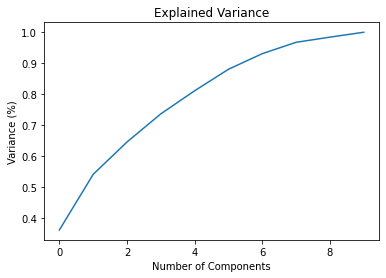

In [94]:
pca = PCA()
principalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

- As we can see 8 PCA component clearly explains the presence of variance with these PCA.

In [95]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x)
principal_x = pd.DataFrame(new_data,columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,0.021430,-1.654817,-2.647088,-0.031690,-0.013905,-0.588069,0.466151,-0.117856
1,-0.093732,-0.606987,-2.699120,-0.255288,2.513349,0.299612,0.307167,-0.025968
2,0.275048,-2.002490,-1.073743,1.351369,-0.910705,-1.578222,-0.149988,-0.033679
3,-0.249721,3.346510,-0.840944,-0.648393,-0.376837,-0.524023,2.159999,-0.500653
4,-4.556392,2.209750,-1.071679,-0.314629,-0.056542,-1.420157,0.268978,0.049849
...,...,...,...,...,...,...,...,...
826,1.234049,0.302393,1.238118,-2.135521,-0.176946,0.112102,-1.092275,0.864086
827,0.188317,-1.972757,1.753251,-0.959679,0.381312,0.056511,0.682930,-0.013811
828,0.236760,-2.153914,1.951035,-0.382677,-0.892146,-0.176796,0.150126,0.020701
829,-0.124009,-0.491971,0.444897,-0.751924,0.264578,1.517482,-1.285929,0.201545


- principal_x is the PCA treated independent variables.
- the purpose of using PCA in this dataset is because there is hughe outliers & many variables shows corr & multicollinearity.

In [96]:
x = principal_x
x.shape, y.shape

((831, 8), (831,))

- x is remapped to principal_x and it is treated pca indpendent variables.
- y also has 831 rows.

In [97]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred=DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    print(MAE, "at random_state", i)

0.700092322073809 at random_state 0
0.7409183068415469 at random_state 1
0.5966266679792962 at random_state 2
0.7254458607970073 at random_state 3
0.5836588974749528 at random_state 4
0.6659907603826954 at random_state 5
0.6441765689786934 at random_state 6
0.6642985772395067 at random_state 7
0.6615809119755152 at random_state 8
0.6910610602463058 at random_state 9
0.5836941307361826 at random_state 10
0.6620898559127997 at random_state 11
0.6683348655692674 at random_state 12
0.5992233587546825 at random_state 13
0.6545863530557554 at random_state 14
0.6410050902898093 at random_state 15
0.6793186018434368 at random_state 16
0.6698605970298548 at random_state 17
0.6802048380870408 at random_state 18
0.6406386885360501 at random_state 19
0.6673998777920263 at random_state 20
0.6748418839954434 at random_state 21
0.6350352950066241 at random_state 22
0.7025352182379182 at random_state 23
0.6147907604034832 at random_state 24
0.6268879214101354 at random_state 25
0.5702554475472307 at r

In [98]:
leastMAE=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    DTR = DecisionTreeRegressor()
    DTR.fit(x_train, y_train)
    pred = DTR.predict(x_test)
    MAE= mean_absolute_error(y_test,pred)
    if MAE>leastMAE:
        leastMAE=MAE
        maxRS=i
print("Least MAE ", leastMAE," on Random_state ",maxRS)

Least MAE  0.7663642597701987  on Random_state  177


- Best Random state selected is 177 with MAE = 0.76

# Splitting Training Set & Test Set.

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 177)

- independent(x) & Target Variable(y) is divided into Train & Test Set.
- 70% data is set for training & 30% data is reserved for testing.
- best Random state is applied which is 177 computed above.

# Linear Regression

In [100]:
lm = LinearRegression()
lm.fit(x_train,y_train) 
pred=lm.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :', r2_score(y_test,pred))
lm.score(x_train,y_train)

Mean Absolute error:  0.7893781024323216
Mean Squared error:  1.0120117992126243
Root Mean Squared Error: 1.0059879717037497
r2_score : 0.5283424071338141


0.6024377906710443

Score of Linear Reg is 0.60 & MAE = 0.79, R2 Score is 0.53

# Decision Tree Regression

In [101]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
pred = DTR.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :', r2_score(y_test,pred))
DTR.score(x_train,y_train) 

Mean Absolute error:  0.7482893124019536
Mean Squared error:  1.1098469839769656
Root Mean Squared Error: 1.053492754591585
r2_score : 0.48274540146701284


1.0

Score of DTR is 1.0 & MAE = 0.75, R2 Score is 0.48

# Random Forest Regression

In [102]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred = RFR.predict(x_test) 
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :', r2_score(y_test,pred))
RFR.score(x_train,y_train)

Mean Absolute error:  0.5350690806852748
Mean Squared error:  0.5285153419820153
Root Mean Squared Error: 0.7269906065294209
r2_score : 0.7536804667830628


0.9697741790436781

Score of RFR is 0.97 & MAE = 0.53, R2 Score is 0.75

# Support Vector Regression

In [103]:
SV = SVR() 
SV.fit(x_train, y_train)
pred = SV.predict(x_test) 
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :', r2_score(y_test,pred))
SV.score(x_train,y_train)

Mean Absolute error:  0.5885869569362528
Mean Squared error:  0.6296856091137586
Root Mean Squared Error: 0.7935273209623968
r2_score : 0.7065291146919974


0.7891312877822556

Score of SVR is 0.79 & MAE = 0.59, R2 Score is 0.79

# K-fold Cross Validation

In [104]:
cross_validation=KFold(5, shuffle =True)

In [105]:
# Linear Regression
print(cross_val_score(lm,x,y,cv=cross_validation).mean())

0.5720072363142034


In [106]:
# DTR Regression
print(cross_val_score(DTR,x,y,cv=cross_validation).mean())

0.5880890218472478


In [107]:
# Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=cross_validation).mean())

0.7703432961335217


In [108]:
# Support Vector
print(cross_val_score(SV,x,y,cv=cross_validation).mean())

0.7276418485508723


# Best Model

- DTR has the least diff from DTR MAE-DTR CV, hence selecting DTR as the best Model.

# Setting DTR Hyperparameter

In [109]:
import numpy as np
parameter = {'max_depth': np.arange(2,8),
             'criterion':['squared_error','friedman_mse','absolute_error'],
             'max_features': ['log2','sqrt','auto'],
             'min_samples_leaf': [1,2],
             'splitter': ['best','random']}
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=cross_validation)

In [110]:
GCV.fit(x_train,y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2],
                         'splitter': ['best', 'random']})

In [111]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [112]:
Final_mod = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth=4, max_features = 'auto', min_samples_leaf = 2,splitter= 'best')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
print('Mean Absolute error: ',mean_absolute_error(y_test,pred))
print('Mean Squared error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score :',r2_score(y_test,pred))
DTR.score(x_train,y_train)

Mean Absolute error:  0.6301938731697934
Mean Squared error:  0.7023105005392496
Root Mean Squared Error: 0.8380396771867366
r2_score : 0.6726816027375262


1.0

- Final best model DTR MAE = 0.63
- r2 score = 0.67 
- DTR learned the model 100%

# Exporting Model with Joblib Library

In [113]:
# Model is exported as .pkl file with the help of joblib library.
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']